# Bibliotecas

In [4]:
import pandas as pd
import numpy as np
import time

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos de aprendizado de máquina
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Métricas
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Carregando base de dados

o problema de classificação de dígitos MNIST dispensa apresentações. Para este trabalho, utilizaremos as imagens com a resolução de 28x28 (cada figura possuí 784 covariáveis) e 20.000 imagens simulações do tempo de execução dos algoritmos.

In [5]:
MNIST_Train = pd.read_csv(
    r"G:\Meu Drive\Data Science\Bases\Classificação\MNIST\train.csv"
)

X_train, X_test, y_train, y_test = train_test_split(
    MNIST_Train.iloc[:20000, 1:],
    MNIST_Train.iloc[:20000, 0],
    test_size = 0.2,
    random_state = 42
)

# Visualização da base

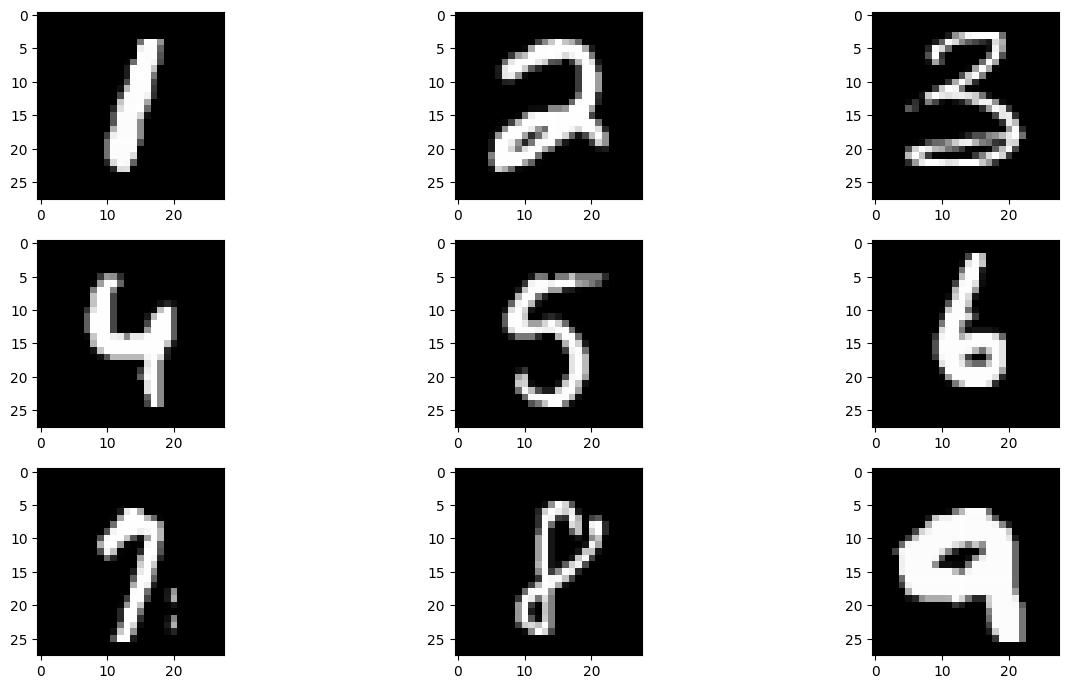

In [6]:
# Além destes valores, temos também  imagem correspondente ao algarismo 0

fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (14, 7))

ax[0, 0].imshow(X_train[y_train == 1].iloc[0, :].values.reshape(28, 28), cmap = 'gray')
ax[0, 1].imshow(X_train[y_train == 2].iloc[0, :].values.reshape(28, 28), cmap = 'gray')
ax[0, 2].imshow(X_train[y_train == 3].iloc[0, :].values.reshape(28, 28), cmap = 'gray')
ax[1, 0].imshow(X_train[y_train == 4].iloc[0, :].values.reshape(28, 28), cmap = 'gray')
ax[1, 1].imshow(X_train[y_train == 5].iloc[0, :].values.reshape(28, 28), cmap = 'gray')
ax[1, 2].imshow(X_train[y_train == 6].iloc[0, :].values.reshape(28, 28), cmap = 'gray')
ax[2, 0].imshow(X_train[y_train == 7].iloc[0, :].values.reshape(28, 28), cmap = 'gray')
ax[2, 1].imshow(X_train[y_train == 8].iloc[0, :].values.reshape(28, 28), cmap = 'gray')
ax[2, 2].imshow(X_train[y_train == 9].iloc[0, :].values.reshape(28, 28), cmap = 'gray')


plt.tight_layout()
plt.show()

In [7]:
clf_list = {
    'Decision Tree' : DecisionTreeClassifier(),
    'KNN' : KNeighborsClassifier(),
    'AdaBoost' : AdaBoostClassifier(),
    'Bagging' : BaggingClassifier(),
    'Random Forests' : RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'XGBoost' : XGBClassifier(),
    'LGBMClassifier' : LGBMClassifier()
}

df = pd.DataFrame()

for clf_nome, clf in clf_list.items():
    print(clf_nome)
    
    # Treinamento dos Modelos
    time_start = time.time()
    clf.fit(X_train, y_train)
    time_end = time.time()
    df.loc[clf_nome, 'Tempo de Treinamento'] = time_end - time_start
    
    # Tempo de predição
    time_start = time.time()
    y_pred = clf.predict(X_test)
    time_end = time.time()
    df.loc[clf_nome, 'Tempo de Previsao'] = time_end - time_start
    
    # Métricas de performance
    df.loc[clf_nome, 'Acurácia'] = accuracy_score(y_test, y_pred)
    df.loc[clf_nome, 'Precisão'] = precision_score(y_test, y_pred, average='weighted', zero_division = 0)
    df.loc[clf_nome, 'Recall'] = recall_score(y_test, y_pred, average='weighted', zero_division = 0)
    df.loc[clf_nome, 'F1-Score'] = f1_score(y_test, y_pred, average='weighted', zero_division = 0)

Decision Tree
KNN
AdaBoost
Bagging
Random Forests
Gradient Boosting
XGBoost
LGBMClassifier
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 93024
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 588
[LightGBM] [Info] Start training from score -2.339508
[LightGBM] [Info] Start training from score -2.194291
[LightGBM] [Info] Start training from score -2.287696
[LightGBM] [Info] Start training from score -2.260963
[LightGBM] [Info] Start training from score -2.307598
[LightGBM] [Info] Start training from score -2.408640
[LightGBM] [Info] Start training from score -2.311374
[LightGBM] [Info] Start training from score -2.291398
[LightGBM] [Info] Start training from score -2.328544
[LightGBM] [Info] Start training from score -2.309484


In [8]:
df.sort_values('F1-Score', ascending = False).round(4)

,Tempo de Treinamento,Tempo de Previsao,Acurácia,Precisão,Recall,F1-Score
LGBMClassifier,35.3892,0.0947,0.9662,0.9664,0.9662,0.9662
XGBoost,99.6702,0.1674,0.9652,0.9653,0.9652,0.9652
KNN,0.0770,3.9683,0.9632,0.9635,0.9632,0.9631
Random Forests,14.6158,0.1888,0.9508,0.9509,0.9508,0.9507
Gradient Boosting,571.2183,0.3579,0.9395,0.9396,0.9395,0.9394
Bagging,35.7128,0.2167,0.9185,0.9187,0.9185,0.9184
Decision Tree,5.3634,0.0206,0.8368,0.8365,0.8368,0.8364
AdaBoost,13.6856,0.6397,0.7300,0.7312,0.7300,0.7289


# Conclusão

O algoritmo de Gradient Boosting na sua implementação na biblioteca `sklearn` apresenta o maior tempo de treinamento dentre todos os algoritmos. Isto acontece por questões de otimizações. O algoritmo é elaborado dentro do próprio Python, enquanto seus concorrentes o são em linguagens de baixo nível.

Dentre os algoritmos que utilizamos, damos destaque para as implementações de Gradient Boosting chamadas de LightGBM e XGBoost. Ambas apesar de terem tempos de treinamento elevados, possuem alta acurácia e F1-Score na base de teste, superando o desempenho dos demais algoritmos. Random Forests também é um dos destaques nesta simulação, podendo ser utilizado caso a volumetria da base aumente consideravelmente, fazendo com que o tempo de treinamento dos modelos seja inviável na prática.